In [220]:
import os
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras import models, layers

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras import backend as K
import pandas as pd
import tensorflow as tf


#importing images from the computer folders to create the dataset

X = []
y = []
classes = ['Big_Muff', 'Blues_Driver', 'Digital_Delay', 'Hall_of_Fame', 'Background']
base_path = '/Users/em/Documents/GitHub/imageclassifier/src/capture/'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        if file.endswith('.png'):
            # load the image
            img = Image.open(base_path + target  + '/' + file)
            img = np.array(img)

            if img.size == 150528:
                X.append(img)
                if target == 'Big_Muff':
                    y.append(0)
                elif target == 'Blues_Driver':
                    y.append(1)
                elif target == 'Digital_Delay':
                    y.append(2)
                elif target == 'Hall_of_Fame':
                    y.append(3)
                elif target == 'Background':
                    y.append(4) 

X = np.array(X)
y = np.array(y)
y = to_categorical(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [132]:
print(y)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [133]:
def image_resizing(image_path):
    """
    This function resizes an input image to 224 X 224
    """
    img = image.load_img(image_path, target_size=(224,224))
    return img

In [134]:
X.shape, y.shape

((582, 224, 224, 3), (582, 5))

In [135]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [136]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((436, 224, 224, 3), (436, 5), (146, 224, 224, 3), (146, 5))

In [142]:
K.clear_session()

model = Sequential([
    Conv2D(filters=6,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    
    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    
    Dense(units=100,activation='relu'),
    
    Dense(units=5,activation='softmax')
])

In [143]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               5017700   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [144]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [146]:
accuracy_metrics = model.fit(X_train,y_train,batch_size=25,epochs=15,validation_split=0.3)

Epoch 1/15
13/13 [==============================] - 3s 230ms/step - loss: 0.8650 - accuracy: 0.9344 - val_loss: 13.5593 - val_accuracy: 0.7023
Epoch 2/15
13/13 [==============================] - 3s 224ms/step - loss: 0.6420 - accuracy: 0.9574 - val_loss: 0.8950 - val_accuracy: 0.9237
Epoch 3/15
13/13 [==============================] - 3s 230ms/step - loss: 5.9094e-04 - accuracy: 1.0000 - val_loss: 0.8394 - val_accuracy: 0.9389
Epoch 4/15
13/13 [==============================] - 3s 248ms/step - loss: 4.3200e-05 - accuracy: 1.0000 - val_loss: 0.8369 - val_accuracy: 0.9389
Epoch 5/15
13/13 [==============================] - 3s 250ms/step - loss: 2.2783e-05 - accuracy: 1.0000 - val_loss: 0.8243 - val_accuracy: 0.9237
Epoch 6/15
13/13 [==============================] - 3s 240ms/step - loss: 1.3903e-05 - accuracy: 1.0000 - val_loss: 0.8286 - val_accuracy: 0.9313
Epoch 7/15
13/13 [==============================] - 3s 244ms/step - loss: 6.8149e-06 - accuracy: 1.0000 - val_loss: 0.8331 - val_ac

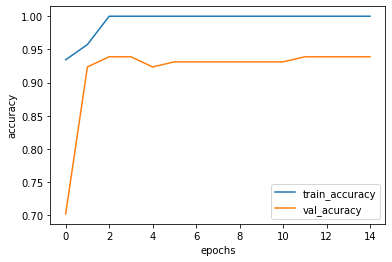

In [147]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

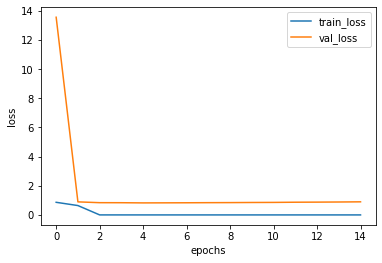

In [148]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [149]:
pred = model.predict(X_test,verbose=1)

5/5 [==============================] - 0s 83ms/step


In [181]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.84%


This is a Hall of Fame, a reverb that will give you more space than your ex!


,image_class,probability
0,Big_Muff,0.0
1,Blues_Driver,0.0
2,Digital_Delay,0.0
3,Hall_of_Fame,100.0
4,Background,0.0


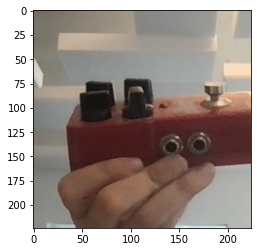

In [172]:
def predict(image_index):
    plt.imshow(X_test[image_index])
    if pred[image_index].argmax() == 0:
        print('This is a Big Muff... best fuzz out there!')
    elif pred[image_index].argmax() == 1:
        print('This is a Blues Driver... a super versatile overdrive')
    elif pred[image_index].argmax() == 2:
        print('This is a Digital Delay, it can repeat your sound... ound...ound...')
    elif pred[image_index].argmax() == 3:
        print('This is a Hall of Fame, a reverb that will give you more space than your ex!')
        
        
    #image_class_prediction(pretrained_model, preprocessed_img)
    #test = np.expand_dims(X_test[image_index], axis=0)
    #model_prediction = model.predict(test,verbose=0)
    #decoded_prediction = decode_predictions(pred[image_index])
    #print(decoded_prediction)
    data = {'image_class': classes,
            'probability': [round(_,8)*100 for _ in pred[image_index]]
           }
    
    df = pd.DataFrame(data=data)
    return df
        

predict(8)

In [ ]:
# vgg16
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

# resnet50
from tensorflow.keras.applications.resnet50 import ResNet50

# mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras import Model


In [183]:
base_model = MobileNetV2(
    weights='imagenet', 
    alpha=1.0,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)

# freeze it!
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [216]:
def model_builder(hp):
    '''
    Args:
    hp - Keras tuner object
    '''
    # Initialize the Sequential API and start stacking the layers
    model = Sequential()
    model.add(base_model)
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-160
    hp_units = hp.Int('units', min_value=32, max_value=160, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    
    # Add next layers
    model.add(keras.layers.Dropout(0.5))
    model.add(Dense(len(classes), activation='softmax'))
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

    return model

In [217]:
# Instantiate the tuner

import keras_tuner as kt

tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_categorical_accuracy', # objective to optimize
                     max_epochs=50,
                     hyperband_iterations=3,
                     project_name='tuning_results')

In [218]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 160, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [222]:
# Perform hypertuning
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tf.autograph.experimental.do_not_convert
tuner.search(X_train, y_train,
             epochs=50,
             batch_size=16,
             callbacks=[stop_early],
             validation_split=1/6)

Trial 14 Complete [00h 00m 19s]
val_categorical_accuracy: 0.3287671208381653

Best val_categorical_accuracy So Far: 0.9589040875434875
Total elapsed time: 00h 04m 14s
INFO:tensorflow:Oracle triggered exit


In [223]:
# best hyperparameters
best_hp=tuner.get_best_hyperparameters(1)[0]

In [226]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                81984     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


In [228]:
tf.autograph.experimental.do_not_convert
h_model.fit(X_train, y_train,
            epochs=50,
            batch_size=16,
            callbacks=[stop_early],
            validation_split=1/6)

Epoch 1/50
23/23 [==============================] - 11s 308ms/step - loss: 3.1430 - categorical_accuracy: 0.3636 - val_loss: 0.7406 - val_categorical_accuracy: 0.7534
Epoch 2/50
23/23 [==============================] - 7s 294ms/step - loss: 1.0064 - categorical_accuracy: 0.5510 - val_loss: 0.6285 - val_categorical_accuracy: 0.7808
Epoch 3/50
23/23 [==============================] - 7s 308ms/step - loss: 0.7735 - categorical_accuracy: 0.6501 - val_loss: 0.3154 - val_categorical_accuracy: 0.9589
Epoch 4/50
23/23 [==============================] - 7s 316ms/step - loss: 0.7018 - categorical_accuracy: 0.6804 - val_loss: 0.2723 - val_categorical_accuracy: 0.9315
Epoch 5/50
23/23 [==============================] - 7s 312ms/step - loss: 0.6935 - categorical_accuracy: 0.7135 - val_loss: 0.1905 - val_categorical_accuracy: 0.9589
Epoch 6/50
23/23 [==============================] - 7s 308ms/step - loss: 0.5609 - categorical_accuracy: 0.7548 - val_loss: 0.2747 - val_categorical_accuracy: 0.9041
Epo

In [230]:
losses = pd.DataFrame(h_model.history.history) # losses in the training history
epoch = losses.index.values+np.ones_like(losses.index.values) # epoch number
loss = losses['loss'].values # training loss
val_loss = losses['val_loss'].values # validation loss

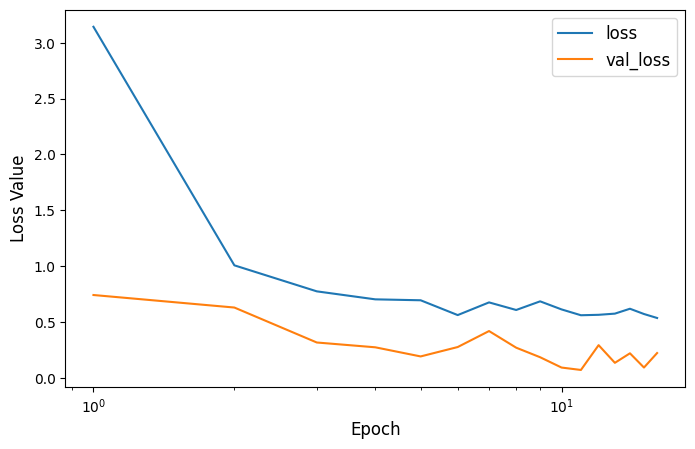

In [231]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,5),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss Value',fontsize=12)
plt.legend(loc=1,fontsize=12)
None

In [233]:
def image_classification(preprocessed_image, model):
    probs = model.predict(preprocessed_image)[0].tolist()
    zipped = sorted(list(zip(classes, probs)), key=lambda x: x[1], reverse=True)
    image_class = [zipped[i][0] for i in range(len(zipped))]
    probability  = [zipped[i][1]*100 for i in range(len(zipped))]
    df = pd.DataFrame(data={'image_class':image_class, 'probability(%)': probability})
    return df

In [235]:
tf.autograph.experimental.do_not_convert
image_classification(X_train[9], h_model)

ValueError: in user code:

    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/em/opt/anaconda3/envs/Project_9/lib/python3.6/site-packages/keras/engine/input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential_2: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)
